# DLProfile Example using Cosmoflow Benchmark

## Set imports and neccessary environment variables

In [1]:
import pathlib
import os
import sys
import matplotlib.pyplot as plt
import warnings
import pprint
import pandas

In [2]:
VANIDL_DIR="{}".format(pathlib.Path(os.getcwd()).parent.absolute())
sys.path.insert(0, VANIDL_DIR)
warnings.filterwarnings('ignore')

In [3]:
os.environ["DARSHAN_DIR"] = "/soft/perftools/darshan/darshan-3.1.8"
os.environ["VANIDL_DIR"] = VANIDL_DIR

#### Formatting

In [4]:
pp = pprint.PrettyPrinter(indent=1)
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

## Create instrance of DL Profile and load the darshan file

In [5]:
from src.vanidl import VaniDL
profile = VaniDL()

In [6]:

DATAPATH_INCLUDES = []
status = profile.Load("/home/dhari/darshan-logs/apps/cosmoflow/cosmo_run3_p8.darshan", data_paths_include=DATAPATH_INCLUDES)
if status:
    print("Darshan Trace loaded Successfully!")
else:
    print("Darshan Trace load Failed!")
    print(profile._error_str())

Loaded Pre-processed DXT DF from file: /tmp/temp_analysis/cosmo_run3_p8_io_dxt_df.csv
Loaded Pre-processed DF from file: /tmp/temp_analysis/cosmo_run3_p8_io_df.csv
Loaded Pre-processed Pattern file: /tmp/temp_analysis/cosmo_run3_p8_pattern.json
Darshan Trace loaded Successfully!


## Use Profile object to analyze the darshan I/O trace.

### Verify if object works

The GetDXTAsDF() function enables users to perform analysis 

In [7]:
df = profile.GetDXTAsDF()
pp.pprint("Files used in the application")
pp.pprint(df['Filename'].unique().tolist())

'Files used in the application'
['/gpfs/mira-home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/configs/scaling_theta.yaml',
 '/home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/config.pkl',
 '/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1008.tfrecords',
 '/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1016.tfrecords',
 '/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1000.tfrecords',
 '/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1024.tfrecords',
 '/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-re

In [8]:
df_normal = profile.GetTraceAsDF()
pp.pprint("Files used in the application")
pp.pprint(df_normal['Filename'].unique().tolist())

'Files used in the application'
['/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1000.tfrecords',
 '/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1008.tfrecords',
 '/home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/checkpoint-003.h5',
 '/home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/checkpoint-004.h5',
 '/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1024.tfrecords',
 '/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1016.tfrecords',
 '/home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/checkpoint-001.h5',
 '/home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scra

### Collect the summary of the Application

In [9]:
summary = profile.GetSummary()
print("\n")
print(color.BOLD + "Data Access Summary (from Darshan):"+ color.END)
print("Total Job time\t\t\t:\t{:0.2f} seconds".format(summary['job_time']))
#FIXME: calculate time per rank and then take max across it.
print("Time spent in I/O\t\t:\t{:0.2f} seconds".format(summary['total_io_time']/8))
print("% Time spent in I/O\t\t:\t{:0.2f}%".format(float(summary['total_io_time'])/8*100/summary['job_time']))
print("Total Data Accessed\t\t:\t{:0.2f} GB".format(float(summary['total_io_bytes'])/1024.0/1024.0/1024.0))
print("Data Access Modules used\t:\t{}".format(summary['io_interface_used']))
print("Data Operations\t\t\t:\t{}".format(summary['io_operations_used']))
print("# of files used\t\t\t:\t{}".format(len(summary['files_used'])))
print("# of MPI Ranks\t\t\t:\t{:0.0f} ranks".format(summary['num_ranks']))
      
print(color.UNDERLINE + "Data Transfer size:"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} bytes and {:0.0f} bytes".format(summary['data_transfer_size']['min'],summary['data_transfer_size']['max']))
print("\tAverage\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['mean']))
print("\tMedian\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['median']))
      
print(color.UNDERLINE + "Data Transfer bandwidth: (per rank)"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} B/s and {:0.0f} MB/s".format(summary['data_transfer_bandwidth']['min'],summary['data_transfer_bandwidth']['max']/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['mean']/1024.0/1024.0))
print("\tMedian\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['median']/1024.0/1024.0))
      
print(color.UNDERLINE + "Access Pattern:"+ color.END)
print("\tSequential\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['sequential'])))
print("\tConsecutive\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['consecutive'])))
#An I/O op issued at an offset greater than where the previous I/O op ended.
#An I/O op issued at the offset immediately after the end of the previous I/O

print("\n")
print(color.BOLD + "Files Summary:"+ color.END)
print("File Types\t\t\t:\t{}".format(summary['file_used_summary']['types']))
print(color.UNDERLINE + "Dataset Size:"+ color.END)
print("\tTotal\t\t\t:\t{:0.1f} GB".format(32))
print("\tMin,Max\t\t\t:\t{:0.1f} GB and {:0.1f} GB".format(2,2))
print("\tAverage\t\t\t:\t{:0.1f} GB".format(2))



Data Access Summary (from Darshan):
Total Job time			:	325.00 seconds
Time spent in I/O		:	4.44 seconds
% Time spent in I/O		:	1.36%
Total Data Accessed		:	256.00 GB
Data Access Modules used	:	['X_POSIX']
Data Operations			:	['read' 'write']
# of files used			:	34
# of MPI Ranks			:	8 ranks
Data Transfer size:
	Min,Max			:	0 bytes and 262144 bytes
	Average			:	262066 bytes
	Median			:	262144 bytes
Data Transfer bandwidth: (per rank)
	Min,Max			:	0 B/s and 2500 MB/s
	Average			:	1951 MB/s
	Median			:	2500 MB/s
Access Pattern:
	Sequential		:	99.99%
	Consecutive		:	99.99%


Files Summary:
File Types			:	['yaml' 'pkl' 'tfrecords']
Dataset Size:
	Total			:	32.0 GB
	Min,Max			:	2.0 GB and 2.0 GB
	Average			:	2.0 GB


In [10]:
pp.pprint("Job time : {} seconds".format(profile.GetJobTime()))

'Job time : 325.0 seconds'


In [11]:
pp.pprint("Time spent by application on I/O: {} seconds".format(profile.GetIOTime()/8))

'Time spent by application on I/O: 4.435593749999938 seconds'


### I/O time spent on each file

In [12]:
for file in df['Filename'].unique():
    print("I/O time for file {}: {:0.2f} seconds".format(file,profile.GetIOTime(filepath=file)))

I/O time for file /gpfs/mira-home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/configs/scaling_theta.yaml: 0.02 seconds
I/O time for file /home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/config.pkl: 0.00 seconds
I/O time for file /lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1008.tfrecords: 8.73 seconds
I/O time for file /lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1016.tfrecords: 8.67 seconds
I/O time for file /lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1000.tfrecords: 9.07 seconds
I/O time for file /lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1024.tfrecords: 9.49 seconds
I/O time

### I/O Time spent per rank

In [13]:
for rank in df['Rank'].unique():
    print("I/O time for rank {}: {:0.2f} seconds".format(rank,profile.GetIOTime(rank=rank)))

I/O time for rank 0: 35.97 seconds
I/O time for rank 1: 36.51 seconds
I/O time for rank 2: 33.86 seconds
I/O time for rank 3: 35.56 seconds
I/O time for rank 4: 35.20 seconds
I/O time for rank 5: 37.06 seconds
I/O time for rank 6: 34.57 seconds
I/O time for rank 7: 35.15 seconds


In [14]:
"Total I/O performed by application: {:0.2f} GB".format(float(profile.GetIOSize())/1024.0/1024.0/1024.0)

'Total I/O performed by application: 256.00 GB'

### I/O performed on each file

In [15]:
for file in df['Filename'].unique():
    print("I/O performed on file {}: {:0.2f} MB".format(file,float(profile.GetIOSize(filepath=file))/1024.0/1024.0))

I/O performed on file /gpfs/mira-home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/configs/scaling_theta.yaml: 0.00 MB
I/O performed on file /home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/config.pkl: 0.00 MB
I/O performed on file /lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1008.tfrecords: 8192.03 MB
I/O performed on file /lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1016.tfrecords: 8192.03 MB
I/O performed on file /lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1000.tfrecords: 8192.03 MB
I/O performed on file /lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1024.tfrecords: 8192.03 MB
I/

In [16]:
for rank in df['Rank'].unique():
    print("I/O performed by rank {}: {:0.2f} MB".format(rank, float(profile.GetIOSize(rank=rank))/1024.0/1024.0))

I/O performed by rank 0: 32654.83 MB
I/O performed by rank 1: 32671.58 MB
I/O performed by rank 2: 32671.58 MB
I/O performed by rank 3: 32671.58 MB
I/O performed by rank 4: 32671.58 MB
I/O performed by rank 5: 32671.58 MB
I/O performed by rank 6: 32671.58 MB
I/O performed by rank 7: 32671.58 MB


In [17]:
print("Size of dataset (bytes)")
pp.pprint(profile.GetFileSizes())

Size of dataset (bytes)
{'checkpoint-001': 961184.0,
 'checkpoint-002': 961184.0,
 'checkpoint-003': 961184.0,
 'checkpoint-004': 961184.0,
 'config': 712.0,
 'history': 96.0,
 'scaling_theta': 592.0}


In [18]:
file="/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1003.tfrecords"
!ls -l $file

ls: cannot access /lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1003.tfrecords: Permission denied


### How application access data over time.

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/cosmo_run3_p8_tm_df.csv


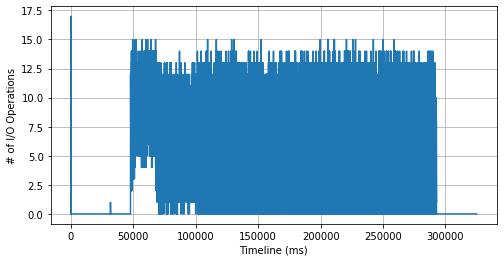

In [19]:
tl = profile.CreateIOTimeline(time_step=0.001)
plt.figure(figsize=(8,4))
plt.xlabel("Timeline (ms)")
plt.ylabel("# of I/O Operations")
plt.grid()
plt.plot(tl['time_step'], tl['operation_count']);

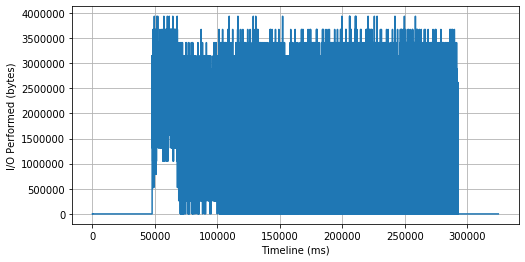

In [20]:
plt.figure(figsize=(8,4))
plt.xlabel("Timeline (ms)")
plt.ylabel("I/O Performed (bytes)")
plt.grid()
plt.plot(tl['time_step'], tl['io_bytes']);

### How files are accessed over the duration of the Job.

[============================================================] 100.0% 24 of 24 Creating Timeline 


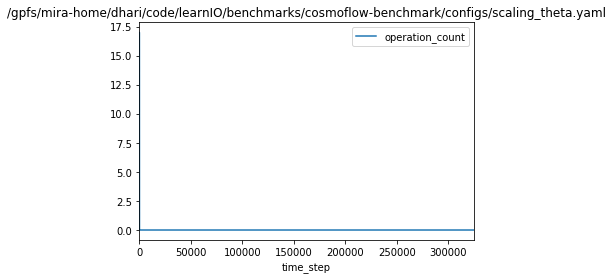


[============================================================] 100.0% 1 of 1 Creating Timeline 


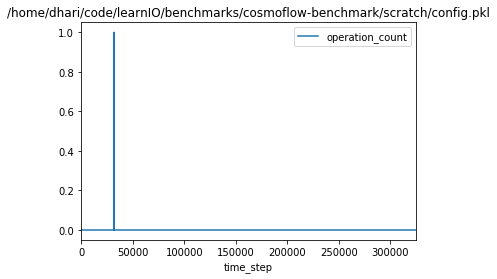

[============================================================] 100.0% 32768 of 32768 Creating Timeline 


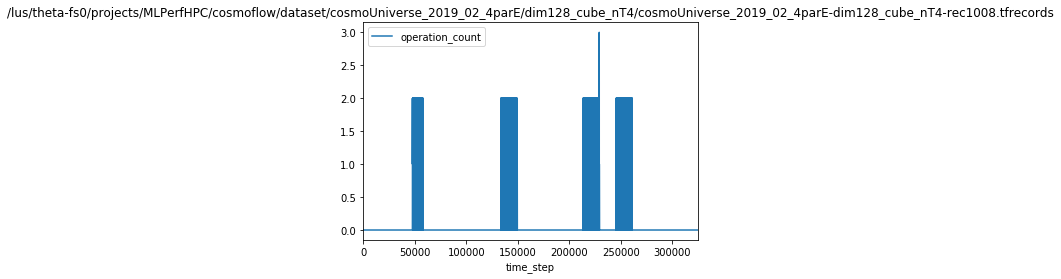

[============================================================] 100.0% 32768 of 32768 Creating Timeline 


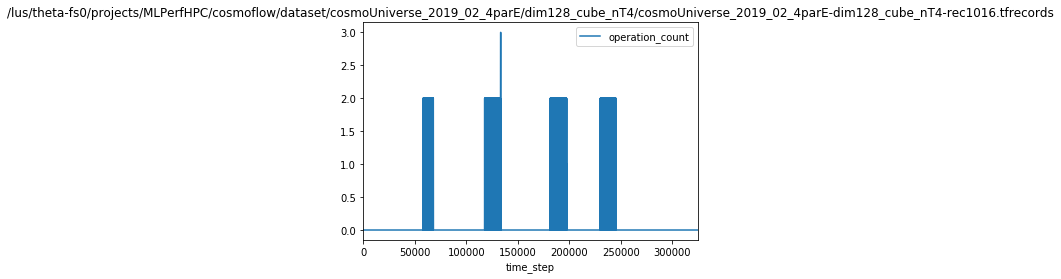

[============================================================] 100.0% 32351 of 32351 Creating Timeline 


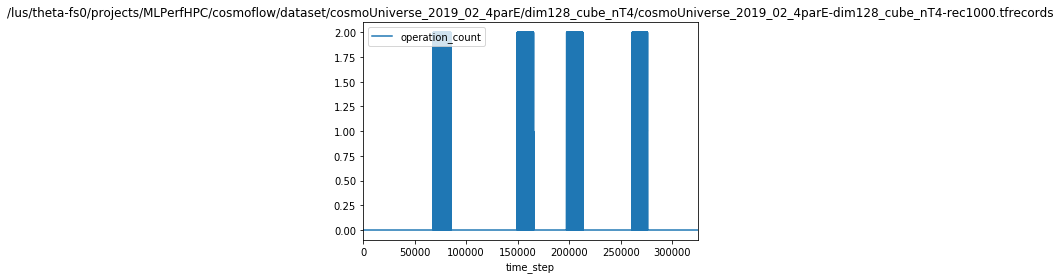

[============================================================] 100.0% 32768 of 32768 Creating Timeline 


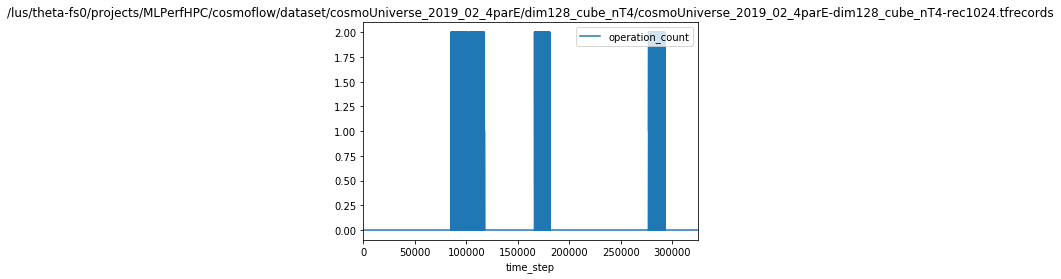

[============================================================] 100.0% 32768 of 32768 Creating Timeline 


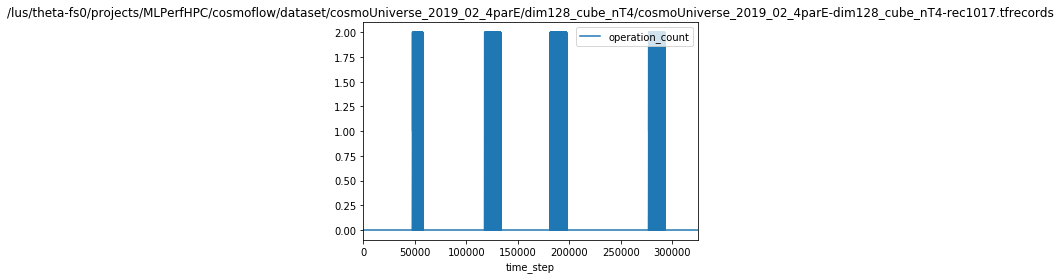

[============================================================] 100.0% 32768 of 32768 Creating Timeline 


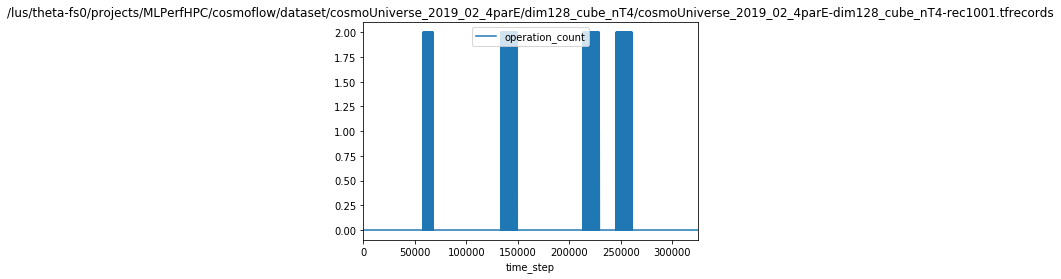

[============================================================] 100.0% 32418 of 32418 Creating Timeline 


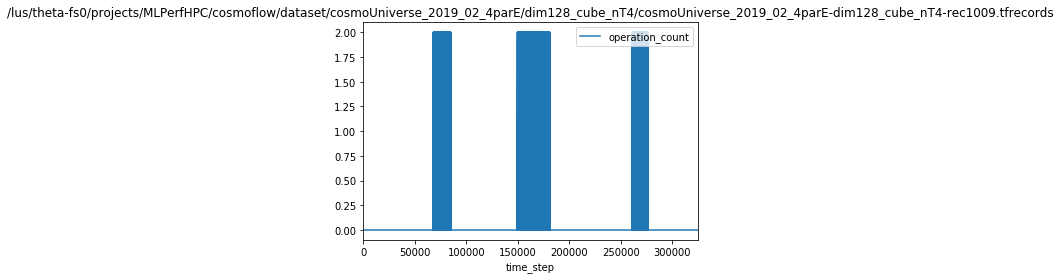

[============================================================] 100.0% 32768 of 32768 Creating Timeline 


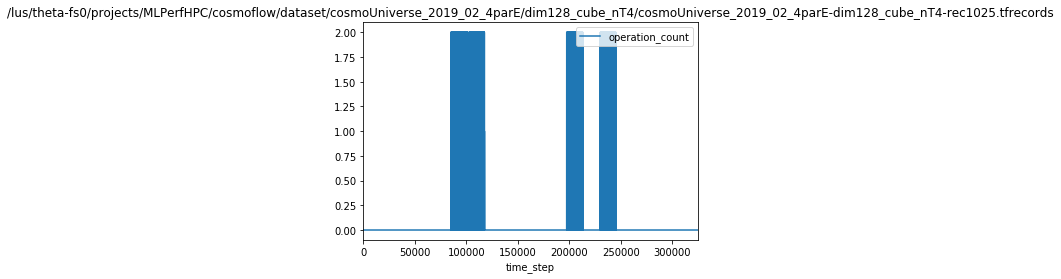

[============================================================] 100.0% 32768 of 32768 Creating Timeline 


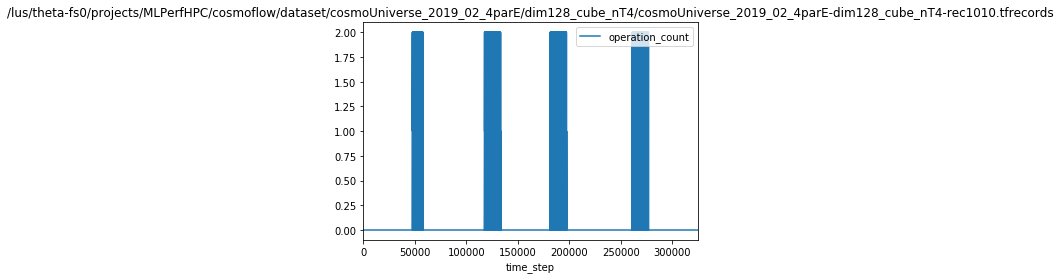

[============================================================] 100.0% 32768 of 32768 Creating Timeline 


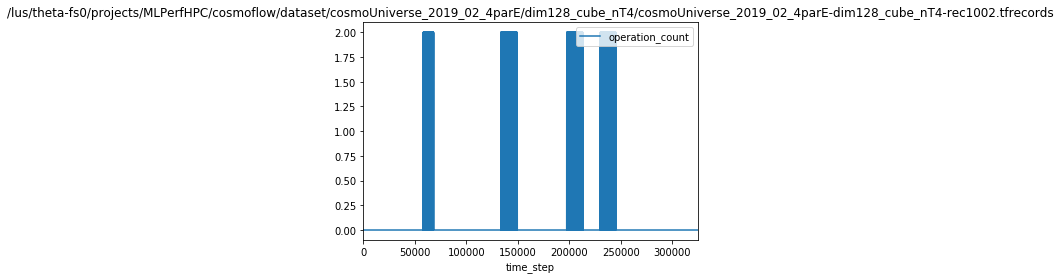

[============================================================] 100.0% 32418 of 32418 Creating Timeline 


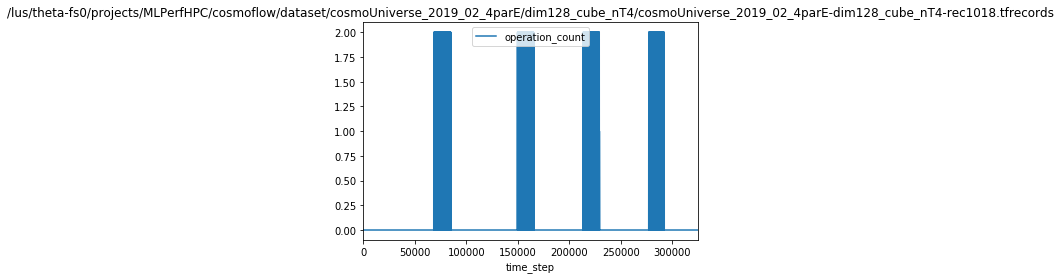

[============================================================] 100.0% 32768 of 32768 Creating Timeline 


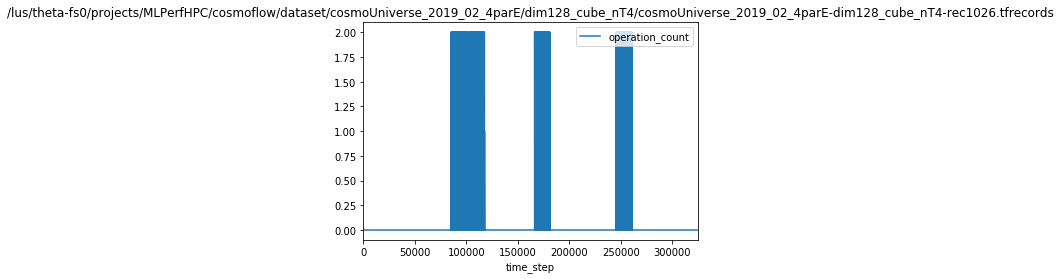

[============================================================] 100.0% 32768 of 32768 Creating Timeline 


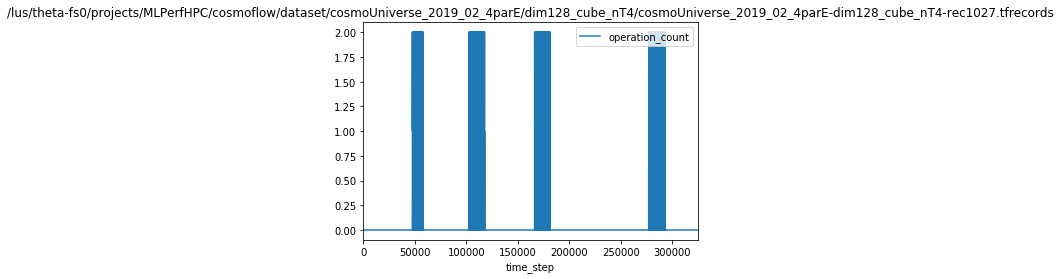

[============================================================] 100.0% 32768 of 32768 Creating Timeline 


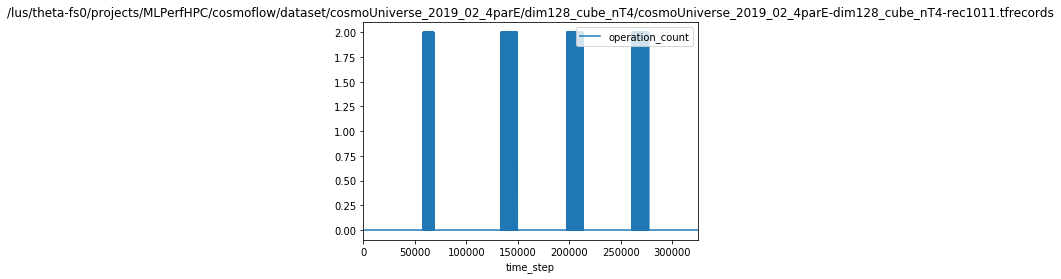

[============================================================] 100.0% 32768 of 32768 Creating Timeline 


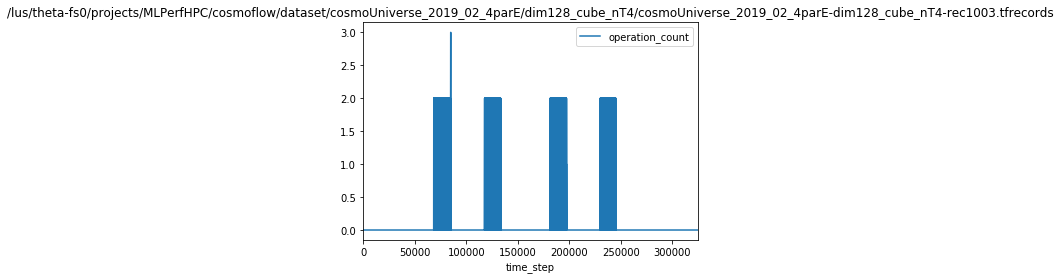

[============================================================] 100.0% 32418 of 32418 Creating Timeline 


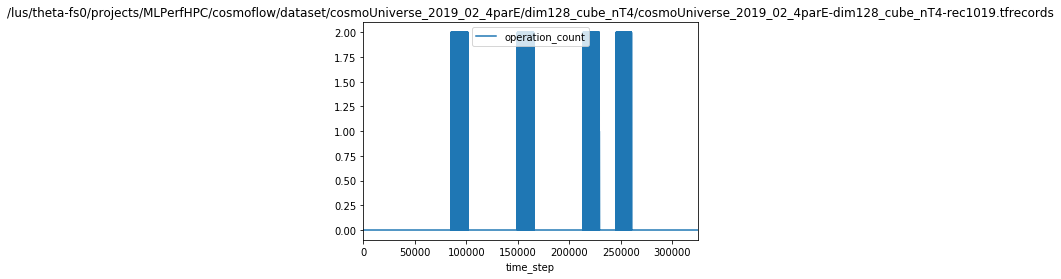

[============================================================] 100.0% 32768 of 32768 Creating Timeline 


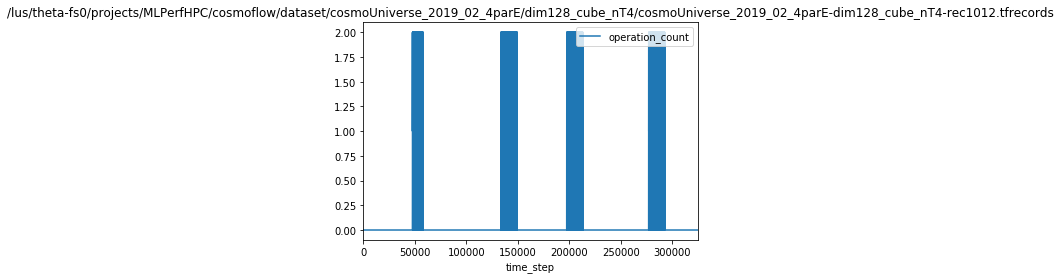

[============================================================] 100.0% 32418 of 32418 Creating Timeline 


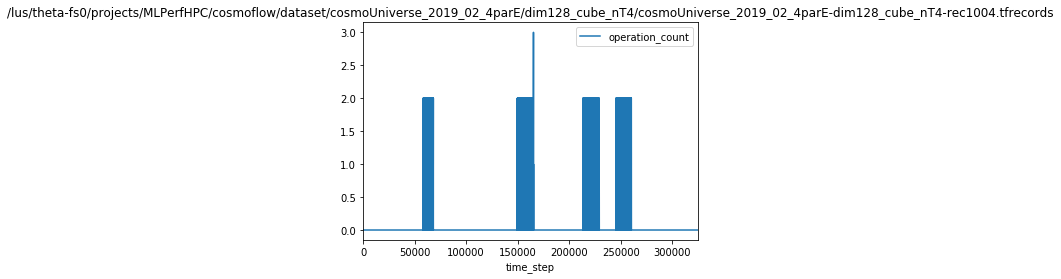

[============================================================] 100.0% 32768 of 32768 Creating Timeline 


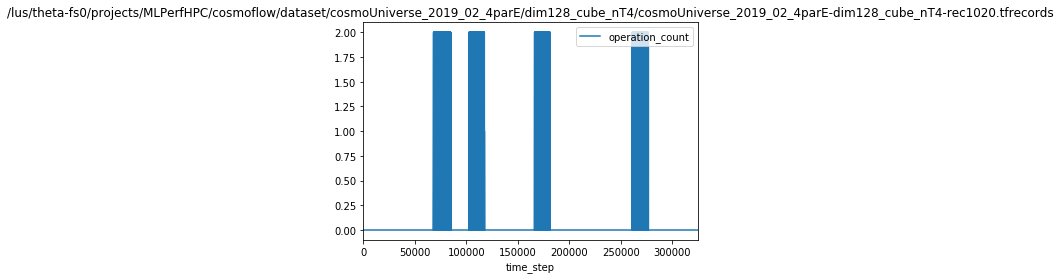

[============================================================] 100.0% 32768 of 32768 Creating Timeline 


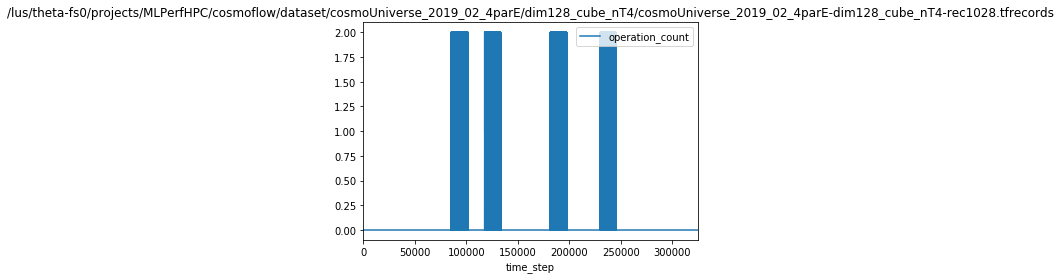

[============================================================] 100.0% 32768 of 32768 Creating Timeline 


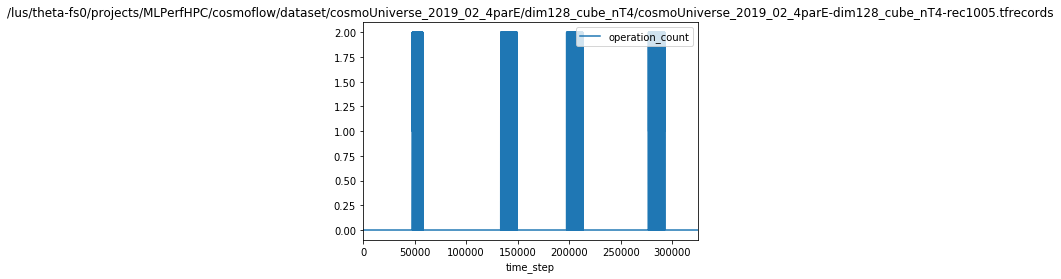

[============================================================] 100.0% 32768 of 32768 Creating Timeline 


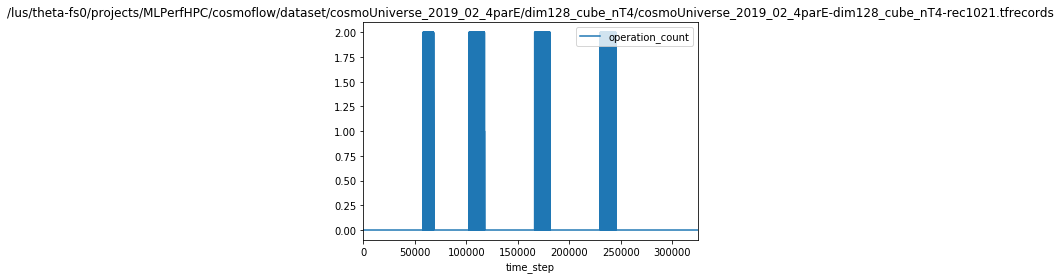

[============================================================] 100.0% 32768 of 32768 Creating Timeline 


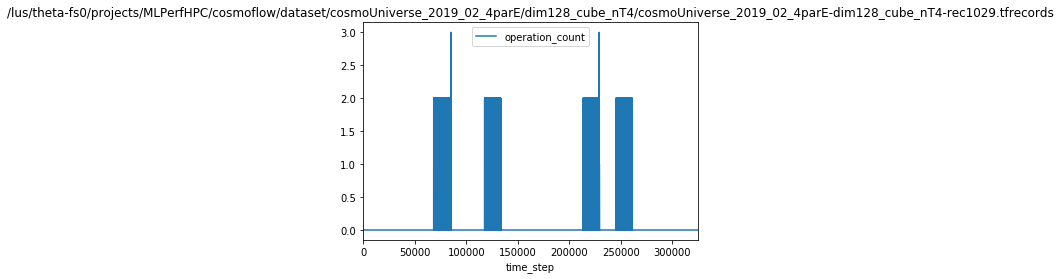

[============================================================] 100.0% 32418 of 32418 Creating Timeline 


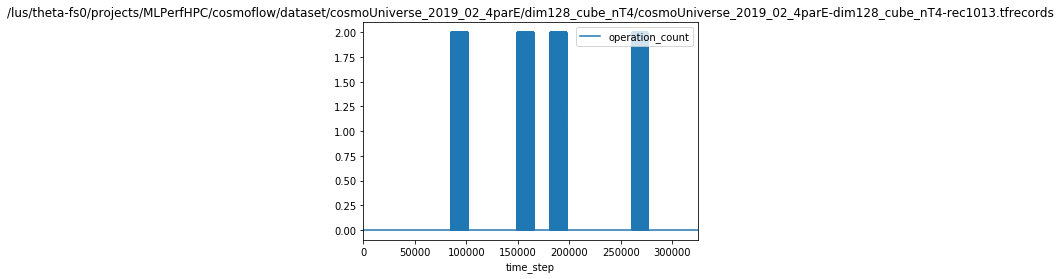

[============================================================] 100.0% 32418 of 32418 Creating Timeline 


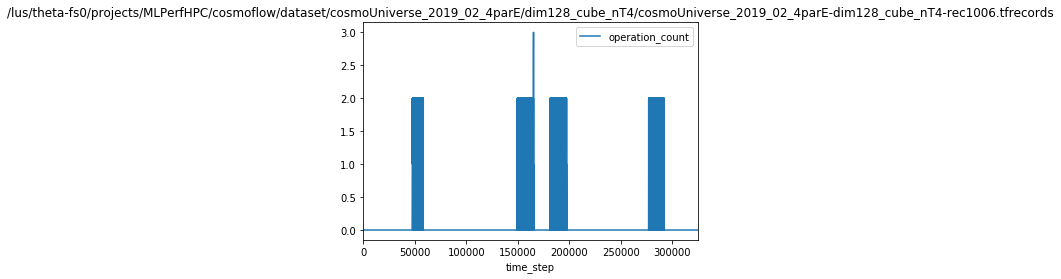

[============================================================] 100.0% 32768 of 32768 Creating Timeline 


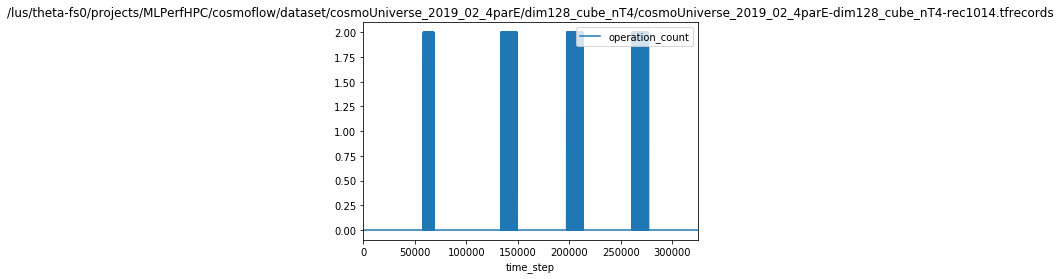

[============================================================] 100.0% 32768 of 32768 Creating Timeline 


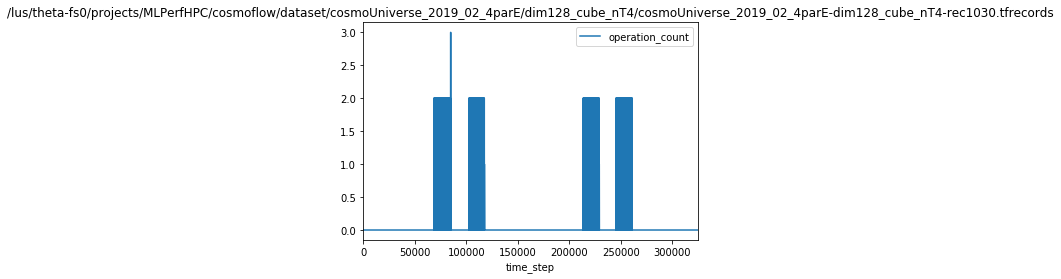

[============================================================] 100.0% 32768 of 32768 Creating Timeline 


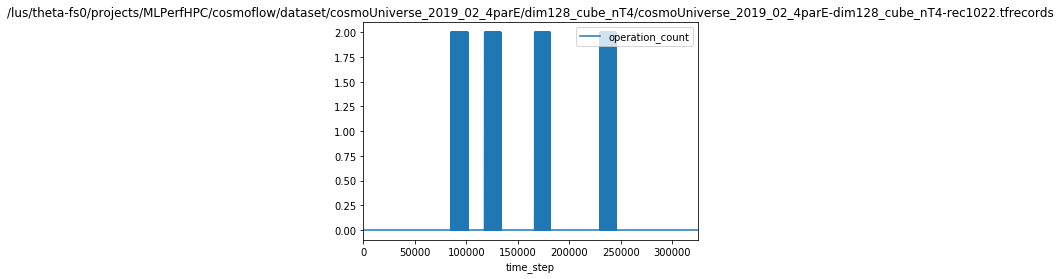

[============================================================] 100.0% 32768 of 32768 Creating Timeline 


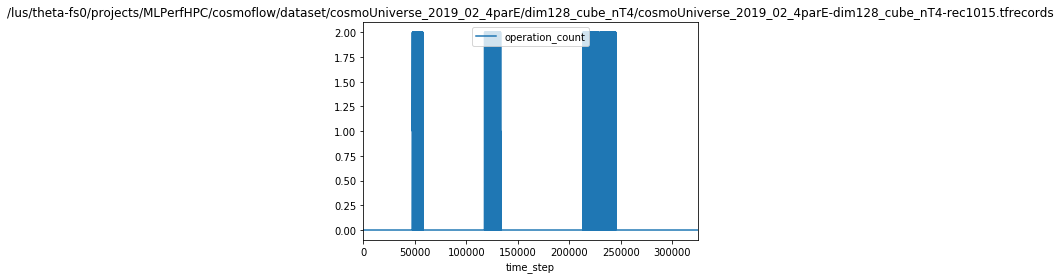

[============================================================] 100.0% 32418 of 32418 Creating Timeline 


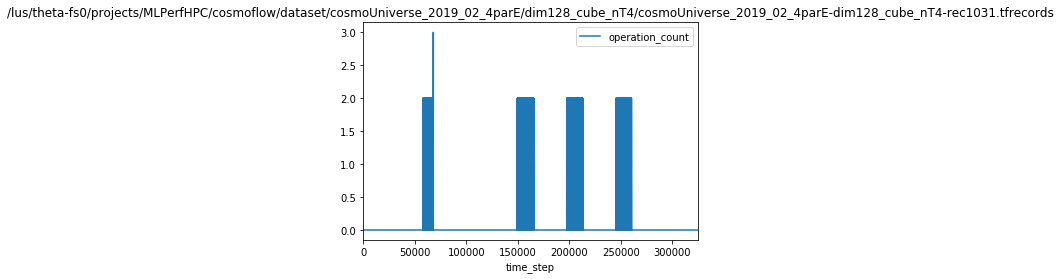

[============================================================] 100.0% 32768 of 32768 Creating Timeline 


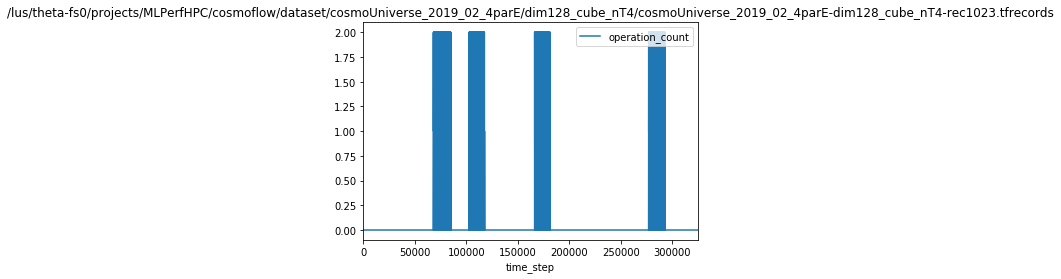

[============================================================] 100.0% 32768 of 32768 Creating Timeline 


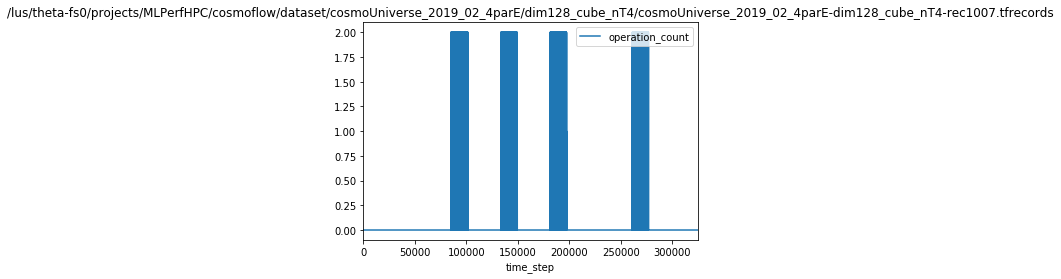

In [21]:
for file in df['Filename'].unique():
    tl = profile.CreateIOTimeline(filepath=file,time_step=0.001)
    tl.plot(x='time_step',y='operation_count', title=file)
    plt.show()

### Show how each file is accessed by each rank.

[============================================================] 100.0% 130659 of 130659 Creating Timeline 


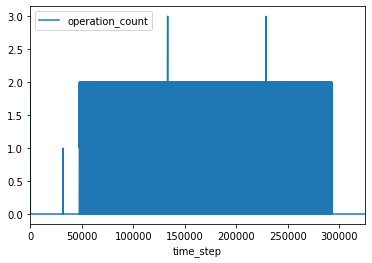

[============================================================] 100.0% 130725 of 130725 Creating Timeline 


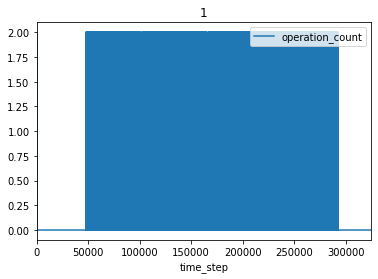

[============================================================] 100.0% 130725 of 130725 Creating Timeline 


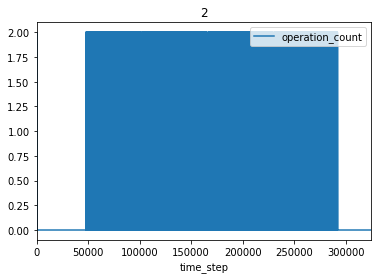

[============================================================] 100.0% 130725 of 130725 Creating Timeline 


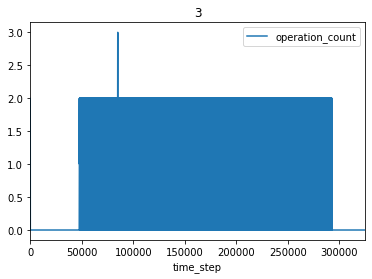

[============================================================] 100.0% 130725 of 130725 Creating Timeline 


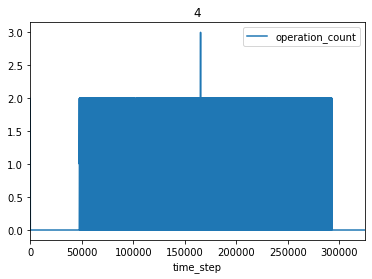

[============================================================] 100.0% 130725 of 130725 Creating Timeline 


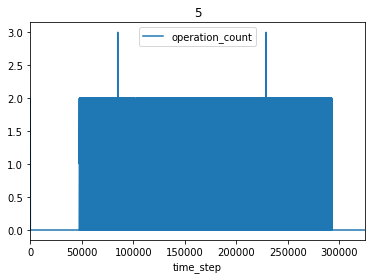

[============================================================] 100.0% 130725 of 130725 Creating Timeline 


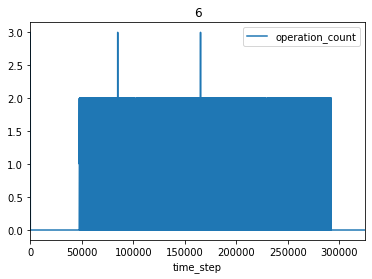

[============================================================] 100.0% 130725 of 130725 Creating Timeline 


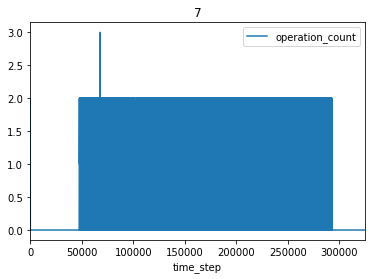

In [23]:
for rank in df['Rank'].unique():
    tl = profile.CreateIOTimeline(rank=rank, time_step = 0.001)
    tl.plot(x='time_step',y='operation_count', title=rank)
    plt.show()

### Data Transfer Size distribution within the application

Text(0.5, 0, 'Transfer Size (bytes)')

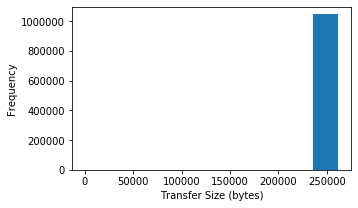

In [24]:
request_df = profile.GetIORequestDistribution()
df['Length'].plot(kind='hist', figsize=(5, 3));
plt.xlabel("Transfer Size (bytes)")

### Data Transfer Size distribution for each file.

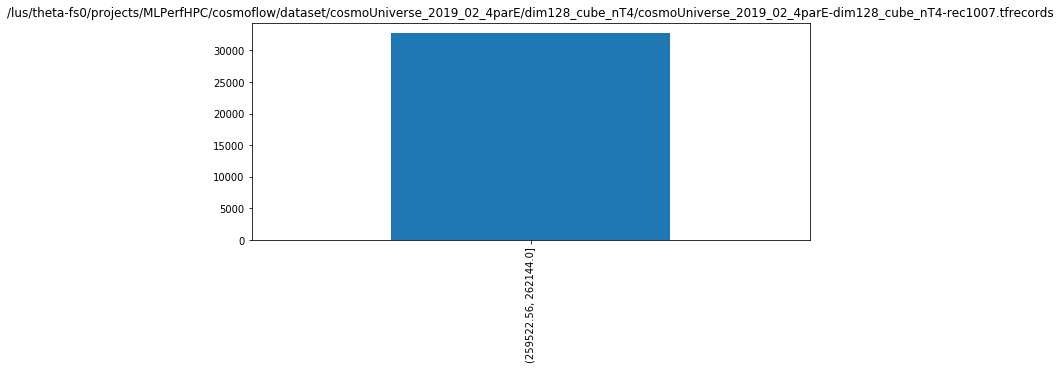

In [25]:
for file in df['Filename'].unique():
    tl = profile.GetIORequestDistribution(filepath=file)
    tl.plot(kind='bar', figsize=(10, 4), title=file)

### Data Transfer Sizes per Rank

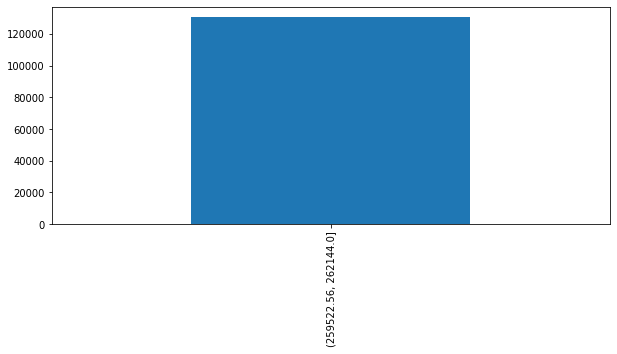

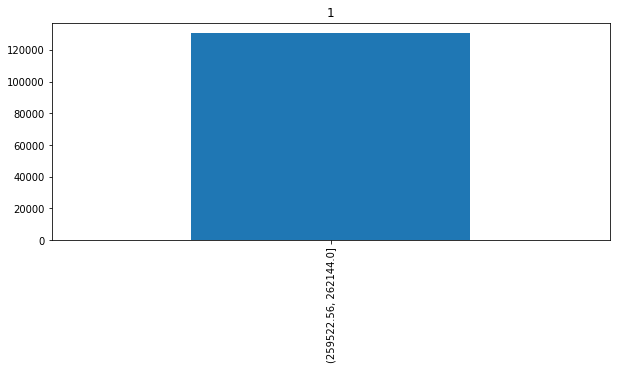

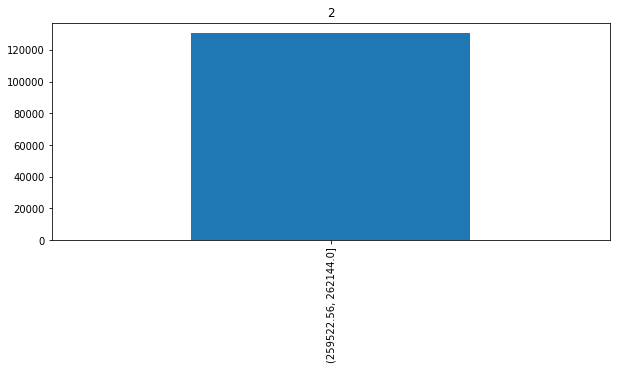

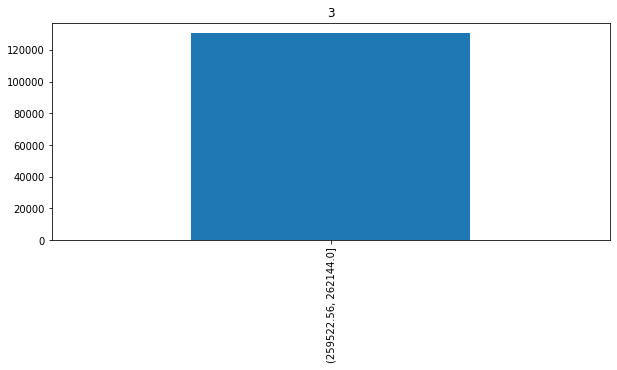

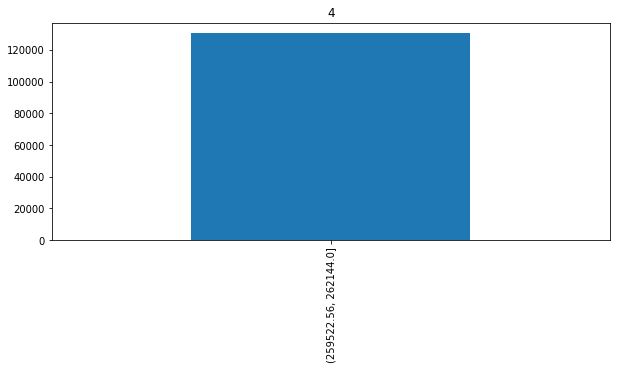

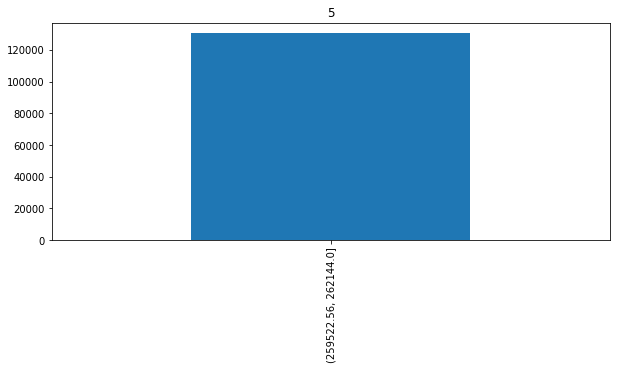

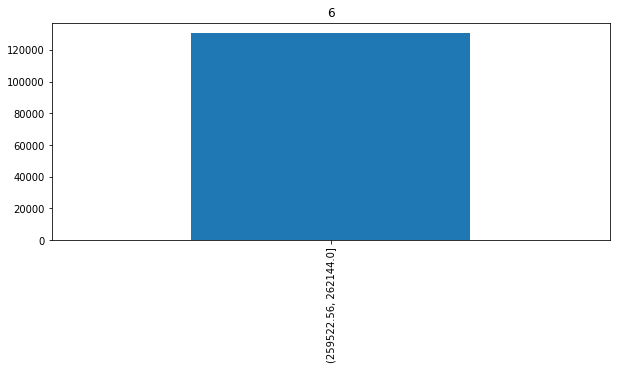

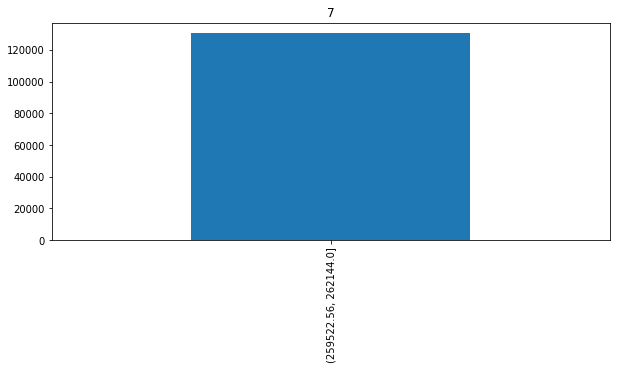

In [26]:
for rank in df['Rank'].unique():
    tl = profile.GetIORequestDistribution(rank=rank)
    tl.plot(kind='bar', figsize=(10, 4), title=rank)
    plt.show()

### File summary of each file accessed by the Application

In [27]:
pp = pprint.PrettyPrinter(indent=1)
for file in df['Filename'].unique():
    print(file)
    pp.pprint(profile.GetFileSummary(file))

/gpfs/mira-home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/configs/scaling_theta.yaml
{'ext': 'yaml',
 'filename': 'scaling_theta',
 'io_size': 4736,
 'io_time': 0.016874999999999998,
 'path': '/gpfs/mira-home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/configs/scaling_theta.yaml',
 'size': 592,
 'special': {}}
/home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/config.pkl
{'ext': 'pkl',
 'filename': 'config',
 'io_size': 712,
 'io_time': 0.0007999999999981355,
 'path': '/home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/config.pkl',
 'size': 712,
 'special': {}}
/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1008.tfrecords


SystemExit: {1009, 'ERROR:{} filepath does not exists.'}

In [28]:
profile.CreateChromeTimeline(location="/home/dhari/timeline/apps/cosmoflow", filename="cosmoflow_run3_p8.json")

[============================================================] 100.0% 1045734 of 1045734 Creating Timeline 


{'traceEvents': [{'name': '/gpfs/mira-home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/configs/scaling_theta.yaml',
   'cat': 'X_POSIX',
   'ph': 'B',
   'ts': 22900,
   'pid': 4,
   'tid': 0,
   'args': {'Module': 'X_POSIX',
    'Filename': '/gpfs/mira-home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/configs/scaling_theta.yaml',
    'Rank': 4,
    'Operation': 'read',
    'Segment': 0,
    'Offset': 0,
    'Length': 592,
    'Start': 0.0229,
    'End': 0.0389}},
  {'name': '/gpfs/mira-home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/configs/scaling_theta.yaml',
   'cat': 'X_POSIX',
   'ph': 'B',
   'ts': 23000,
   'pid': 3,
   'tid': 0,
   'args': {'Module': 'X_POSIX',
    'Filename': '/gpfs/mira-home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/configs/scaling_theta.yaml',
    'Rank': 3,
    'Operation': 'read',
    'Segment': 0,
    'Offset': 0,
    'Length': 592,
    'Start': 0.023,
    'End': 0.039}},
  {'name': '/gpfs/mira-home/dhari/code/learnIO/benchmarks